# Titanic Analysis With NumPy And Pandas

The aim of this project is using Numpy and Pandas to analyse a data set containing information on the Titanic and then communicating findings as well as I can using only Python and it's libraries NumPy and Pandas with and Matplotlib.

# Data Description

This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).

survival: Survival (0 = No; 1 = Yes)
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
Special Notes:

Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5
With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored. The following are the definitions used for sibsp and parch.

Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse: Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent: Mother or Father of Passenger Aboard Titanic
Child: Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic
Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them. As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

# Importing The DataSet 

In [1]:
##Importing the csv file from location on storage into a pandas data frame

import numpy as np
import pandas as pd

titanic_df = pd.read_csv('titanic_data.csv')  #Read the csv file as a pandas dataframe
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
len(titanic_df['Ticket'].unique())           ##Checking on a slice of the data in the list  
len(titanic_df) - len(titanic_df['Ticket'].unique()) 
len(titanic_df)

891

# QUESTIONS

Inspecting the data on Excel Spreadsheets, I have come up with quite a few intriguing questions I propose to answer.

These questions are:

1) I'm interested in seeing how survival varied by age. 
   - I am also interested in calculating these totals by categories. Did Women, Children, Men and The Elderly have a greater chance of surviving?
   - b) Did Age in general affect survivability? And how, if so?

     
2) Exploring the Relationships between factors that might affect survivability:

   - Sex and survivability. How did the female fare sex compared to males. 
   - Class and survivability. Did people in one class survive better compared to other classes? And which class was it?
   - Any relationships between Passenger Fare and survivability   
   - Port of Embarkation and survivability  (Ports of Embarkation are C = Cherbourg, Q = Queenstown, S = Southampton)
     
3) Also searching through these possible relationships might be interesting:
      
   - Are those who are more affluent or wealthy (judging by Fare and Class) given some form of preference?
   
        - Also, what price of ticket determines what class one is put into. If class affected survivability, could we therefore say that ones fate was sealed as soon as one paid for tickets?
   
   - Did Families fare well in survival. (This touches on number of siblings and parent child relationshps)



# CLEANING THE DATA

In [4]:
print (titanic_df['PassengerId'].count())

titanic_df.isnull().sum() ##Checks the dataframe fields for empty data points and sums up the number by field

891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the results:
177 passengers are missing age information, 687 passengers are missing Cabin data and 2 passengers are missing Embarked Data

As age is one of the fields we propose to analyze, we have to consider a method of either clearing out the null data or replacing such. I decided to replace missing age data with the mean of the data with the suspection that perhaps the missing factors may not in fact be Randomly misssing.

Cabin data is not under investigation and so, ignoring it will have no negative effects.

For the two parts of Embarked data we will substitute with the mode.

One thing to also consider is reducing the data frame by cleaning out the columns not under investigation.

If we are to investigate data by family then we must consider how families are displayed on the data. Perhaps those with the same first name, ticket number and sibsp number. Then including a column combining this data together might work for this purpose only might be appropriate. 

In [5]:
def split_name(data):  #Splits the passengers name and returns only the first name (at index in the split list)
    return data.split(',')[0]

#titanic_first_names.rename(columns={'SibSp':'Family Key', 'Name':'Family Name'}, inplace = True)
#titanic_df = titanic_df.merge(titanic_first_names, on = 'PassengerId', how = 'left',)

##Creating a hash key for family members by combining their ticket number and family name

titanic_df['Family Name'] = titanic_df['Name'].apply(split_name)

titanic_df['Family Key'] = titanic_df['Family Name'] + titanic_df['Ticket']

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Family Name  \
0      0         A/5 21171   7.2500   NaN        S      Braund   
1      0          PC 17599  71.2833   C85        C     Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S   Heikkinen   
3      0            113803  53.1000  C123        S    Futrelle   
4      0            373450   8.0500   NaN        S       Allen   

                  Family Key  
0            BraundA/5 21171  
1            CumingsPC 17599  
2  HeikkinenSTON/O2. 3101282  
3             Futrelle113803  
4                Allen373450

In [6]:
## df.duplicated Returns the number of Entries that are not duplicated and we sum those up

print ('There are about {} people travelling together.'.format(len(titanic_df) - len(titanic_df['Ticket'].unique())))
print ('\nThere are at most {} families.'.format(titanic_df.duplicated('Family Name').sum()))
print ('\nThere are at least {} families.'.format(titanic_df.duplicated('Family Key').sum()))

There are about 210 people travelling together.

There are at most 224 families.

There are at least 152 families.


We have a maximum of 224 families because some families, individuals or both will of course share the same last name. Bringing in the family Key reduces the number to about 152

In [7]:
##Dropping unused columns in the dataframe

titanic_data = titanic_df.drop(['Name','PassengerId', 'Ticket', 'Cabin'], axis=1)

titanic_data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked Family Name  \
0         0       3    male  22.0      1      0   7.2500        S      Braund   
1         1       1  female  38.0      1      0  71.2833        C     Cumings   
2         1       3  female  26.0      0      0   7.9250        S   Heikkinen   
3         1       1  female  35.0      1      0  53.1000        S    Futrelle   
4         0       3    male  35.0      0      0   8.0500        S       Allen   

                  Family Key  
0            BraundA/5 21171  
1            CumingsPC 17599  
2  HeikkinenSTON/O2. 3101282  
3             Futrelle113803  
4                Allen373450

In [14]:
##Replacing missing age data with the mean

titanic_df['Embarked'] = titanic_df['Embarked'].replace(np.nan, titanic_df['Embarked'].mode)

# Investigating The Data and Visualization

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

import seaborn as sns

## Question 1

#### A) Did Women, Children and the Elderly have a better chance of survival?

To investigate this question, we split the ages into categories where:

- Children          Ages below 18
                                                            
- Middle Aged Men    Men with ages between 31 & 49
                              
- Middle Aged Women  Women with ages between 31 & 49            
                              
- Young Men         Men between ages 17 & 31
                  
- Young Women       Women between ages 17 & 31

- Elderly           Ages above 49     

In [16]:
#titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Age'] > 17) & (titanic_data['Age'] < 31)].head()
palettes=['#FC2847','black']

In [17]:
##Categorizing the data by age into four groups
##Elders: Older than 50, 

titanic_data_age = titanic_data.copy()

##Selects data where sex is female and age range is between 18 and 30. Adds that data to a new column 'Age Group'.
##Sets property for all rows to 'Young Women'.

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'female') & (titanic_data_age['Age'] > 18) & (titanic_data_age['Age'] < 35)),\
                     'Age Group'] = 'Young Women'

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'male') & (titanic_data_age['Age'] > 18) & (titanic_data_age['Age'] < 35)),\
                             'Age Group'] = 'Young Men'

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'male') & (titanic_data_age['Age'] >= 35) & (titanic_data_age['Age'] <= 55)),\
                             'Age Group'] = 'Middle Age Men'

titanic_data_age.loc[ \
    ((titanic_data_age['Sex'] == 'female') & (titanic_data_age['Age'] >= 35 ) & (titanic_data_age['Age'] <= 55)),\
                     'Age Group'] = 'Middle Age Women'

titanic_data_age.loc[(titanic_data_age['Age'] > 10) & (titanic_data_age['Age'] < 19),'Age Group'] = 'Adolescents'

titanic_data_age.loc[(titanic_data_age['Age'] < 10),'Age Group'] = 'Young Children'

titanic_data_age.loc[(titanic_data_age['Age'] > 55),'Age Group'] = 'Elderly'

In [19]:
groups = titanic_data_age.dropna().groupby(['Age Group', 'Survived']).size()

#round(((groups['Children'] / len(titanic_data_age['Age Group']=='Children'))*100),3)
#print(groups[titles[0]])
#print(groups[titles[0]],':', len(titanic_data[titanic_data_age['Age Group']=='Young Men']))
i=0
print(groups['Young Children',0],
groups['Young Children'].sum(),
groups['Young Children',1])

##groups[titles[i],1]

24 62 38


Age Group         Survived
Adolescents       0            43
                  1            32
Elderly           0            28
                  1            11
Middle Age Men    0            98
                  1            25
Middle Age Women  0            15
                  1            56
Young Children    0            24
                  1            38
Young Men         0           188
                  1            40
Young Women       0            26
                  1            86
dtype: int64


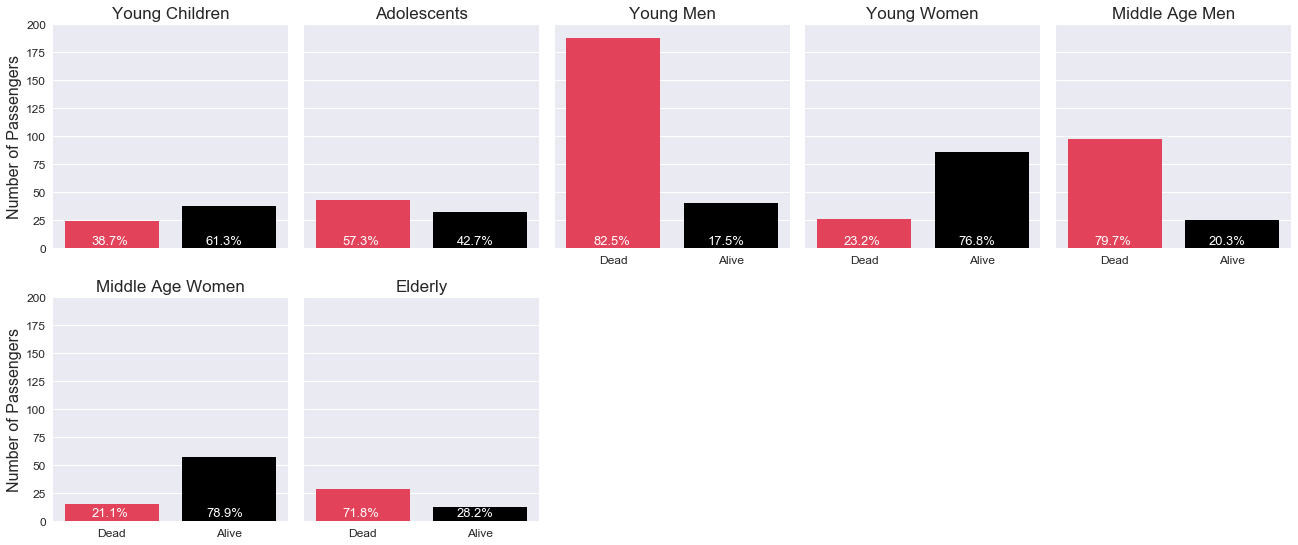

In [20]:
# Grouping the values as by Age Group and Survival
groups = titanic_data_age.dropna().groupby(['Age Group','Survived']).size()
print (groups)

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)

               #We set the title for each plot according to the listed titles
titles = ['Young Children','Adolescents','Young Men','Young Women','Middle Age Men','Middle Age Women','Elderly']
                    #tit=list(titanic_data_age['Age Group'].unique())
    
          # Graph to compare survival count between Age Groups
chart = sns.factorplot('Survived', col='Age Group', col_wrap=5, palette=palettes,data=titanic_data_age,  \
                       kind='count',size=4, aspect=0.9, col_order=titles)


chart.set_axis_labels('', 'Number of Passengers') # Setting the labels for the plot
chart.set_ylabels(fontsize=16)
#chart.set_xlabels('Survivorship', fontsize=15)
chart.set_xticklabels(['Dead', 'Alive'])
                

for i,ax in enumerate(chart.axes.flat):
    ax.set_title(titles[i], fontdict = {'fontsize': 17})
    percentage_survival = round((  (groups[titles[i],1] / groups[titles[i]].sum() )*100) ,1) #calclating the % survival by group
    percentage_deceased = round((  (groups[titles[i],0] / groups[titles[i]].sum() )*100) ,1)#calclating the % deceased by group
    ax.text(0.8, 4, str(percentage_survival)+'%',   color='white', fontdict = {'fontsize': 13})
    ax.text(-0.17, 4, str(percentage_deceased)+'%',   color='white', fontdict = {'fontsize': 13})
    ax.set_yticks(range(0,220,25))

plt.savefig('Survival by Category.png',dpi=200)

#### NOTES:

It seems that Women and Children generally seem to have a higher survivability rate with 'Middle Age Women' and 'Young Women' on top with survival rates in the 70's. Men and generally people above 50 seemed to fare badly.

It might be interesting to investigate data on children in particular to see exactly what age range survives better.

### Question 

#### 1b) Did Age in general affect survivability? And how if so?

We can look at this by considering:
- The age distribution of survivors compared to non-survivors as well as the overall data.
- Compare survivor age data to non-survivor

Passengers with Age data:  714
Mean Age:  29.69911764705882
Youngest Passenger:  29.69911764705882
Oldest Passenger:  80.0
Most Recurent Ages:  0    24.0
dtype: float64


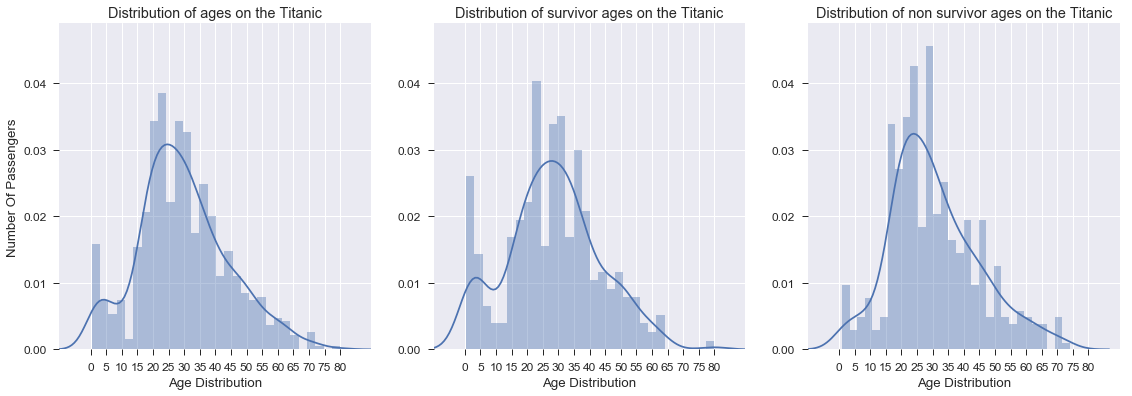

In [13]:
##TAKING THE AGES FROM THE TITANIC DATA BY AGE AND PLOTTING A HISTOGRAM

survivor_ages = titanic_data_age[['Age', 'Survived']].copy()
survivor_ages = survivor_ages[survivor_ages['Survived']==1]

non_survivor_ages = titanic_data_age[['Age', 'Survived']].copy()
non_survivor_ages = non_survivor_ages[non_survivor_ages['Survived']==0]

sns.set(style='darkgrid',font='sans-serif',font_scale=1.2)

fig,axes = plt.subplots(figsize=(19,6),nrows=1,ncols=3)

ax1 = sns.distplot(titanic_data_age['Age'].dropna(), bins=30, ax=axes[0], kde=True)

ax2 = sns.distplot(survivor_ages['Age'].dropna(), bins=30, ax=axes[1])

ax3 = sns.distplot(non_survivor_ages['Age'].dropna(), bins=30, ax=axes[2])

labels = ['Distribution of ages on the Titanic','Distribution of survivor ages on the Titanic',\
          'Distribution of non survivor ages on the Titanic']

for i, ax in enumerate([ax1,ax2,ax3]):
    ax.set_ylim(0,0.049)
    ax.set_xlim(-10,90)
    ax.set_xticks(range(0,85,5))
    ax.set_xlabel('Age Distribution')
    ax1.set_ylabel('Number Of Passengers') 
    ax.set_title(labels[i])
    ax.tick_params(direction='out', length=6, width=1)
 

age_data = titanic_data_age['Age'].dropna()


print('Passengers with Age data: ',len(age_data))
print('Mean Age: ',age_data.mean())
print('Youngest Passenger: ',age_data.mean())
print('Oldest Passenger: ',age_data.max())
print('Most Recurent Ages: ',age_data.mode())

0

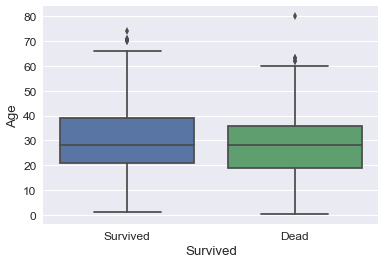

In [40]:
a0 = sns.boxplot(x="Survived", y="Age", data=titanic_data_age)
a0.set_xticklabels(["Survived", "Dead"])

In [1004]:
non_surv_age = non_survivor_ages['Age'].dropna()
surv_age = survivor_ages['Age'].dropna()

print('                                        ¦            ')
print('Survivors                               ¦ Non-Survivors')
print('                                        ¦            ')
print('Total Survivors with Age data: ',len(surv_age),'    ¦ Total Non-Survivors with Age data: ',len(non_surv_age))
print('Mean Age: ',surv_age.mean(),             '          ¦ Mean Age: ',non_surv_age.mean())
print('Youngest Survivor: ',surv_age.min(),'               ¦ Youngest Non-Survivor: ',non_surv_age.min())
print('Oldest Survivor: ',surv_age.max(),'                 ¦ Oldest Non-Survivor: ',non_surv_age.max());
print('Most Common Survivors Ages: ',non_surv_age.mode(), '\
                         ¦ Most Common Non-Survivors Ages: ',(surv_age.mode()));
print('                                        ¦            ')
print('                                        ¦            ')

                                        ¦            
Survivors                               ¦ Non-Survivors
                                        ¦            
Total Survivors with Age data:  290     ¦ Total Non-Survivors with Age data:  424
Mean Age:  28.343689655172415           ¦ Mean Age:  30.62617924528302
Youngest Survivor:  0.42                ¦ Youngest Non-Survivor:  1.0
Oldest Survivor:  80.0                  ¦ Oldest Non-Survivor:  74.0
Most Common Survivors Ages:  0    21.0
dtype: float64                          ¦ Most Common Non-Survivors Ages:  0    24.0
dtype: float64
                                        ¦            
                                        ¦            


#### NOTES

About 290 people survived the sinking of the titanic with 424 people dead.

- The ages of survivors on the Titanic seems to be relatively younger.

- The largest number of survivors seemed to be between ages 20 and 25.


For non-survivors however:
- The largest number of non-survivors (is between ages between 28 and 30) seemed to peak on the side of early twenties while survivors peaked on the other side. 

- Of particular note is infant mortality and that of the elderly with about a third of infants(0-1) being saved, same as those of adults. 

Of note is the survival of children between ages 0 - 5 which is particularly high from what we can see.

While the above has given some interesting insights into age data, it has yet to fully answer our question. Perhaps we then we would look at all ages and compare the survivors. We should get pretty much the same data but without bins.

#### CURIOUSITY: MORE CONCRETE AGE COMPARISON

In [1005]:
def conv_to_int(age):
    if age>= 0:
        return int(age)
    elif age =='NaN' or age==None:
        return age
    elif age<0:
        return (age)

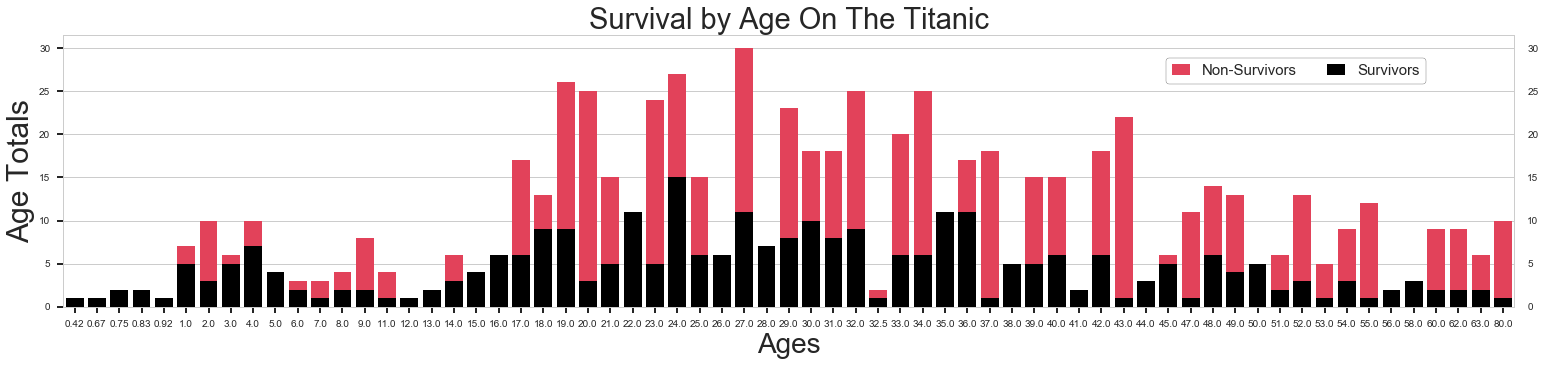

In [1006]:
sns.set(style='whitegrid')
import matplotlib.ticker as ticker

#titanic_data_age['Age'] = titanic_data_age['Age'].apply(conv_to_int)
#survivor_ages['Age'] = survivor_ages['Age'].apply(conv_to_int)

fig,axes = plt.subplots(figsize=(26,5))

ax1 = sns.countplot(x="Age",data=titanic_data_age.dropna(),ax=axes, color='#FC2847', label='Non-Survivors')
ax2 = sns.countplot(x='Age',data=survivor_ages.dropna(), ax=axes, color='black', label='Survivors')

ax1.set_xlabel('Ages', fontsize=28)
ax1.set_ylabel('Age Totals', fontsize=30)

#ax1.tick_params(direction='out', length=6, width=2)

#ax1.yaxis.tick_right()
#ax1.yaxis.set_ticks_position('both')

#sns.despine(offset=20, trim=True)

ax1.tick_params(axis='y',which='both',labelleft='on', labelright='on', direction='out', length=6, width=2)
ax1.tick_params(axis='x',which='both',labeltop='off', labelbottom='on', direction='out', length=6, width=2)

plt.legend(fontsize = 15, loc=(0.76,0.82),ncol=2, frameon=True, edgecolor='black', handlelength=1.2);

plt.title('Survival by Age On The Titanic',  fontdict = {'fontsize': 29});


plt.savefig('Survival by Age On The Titanic 2.png', dpi=300)

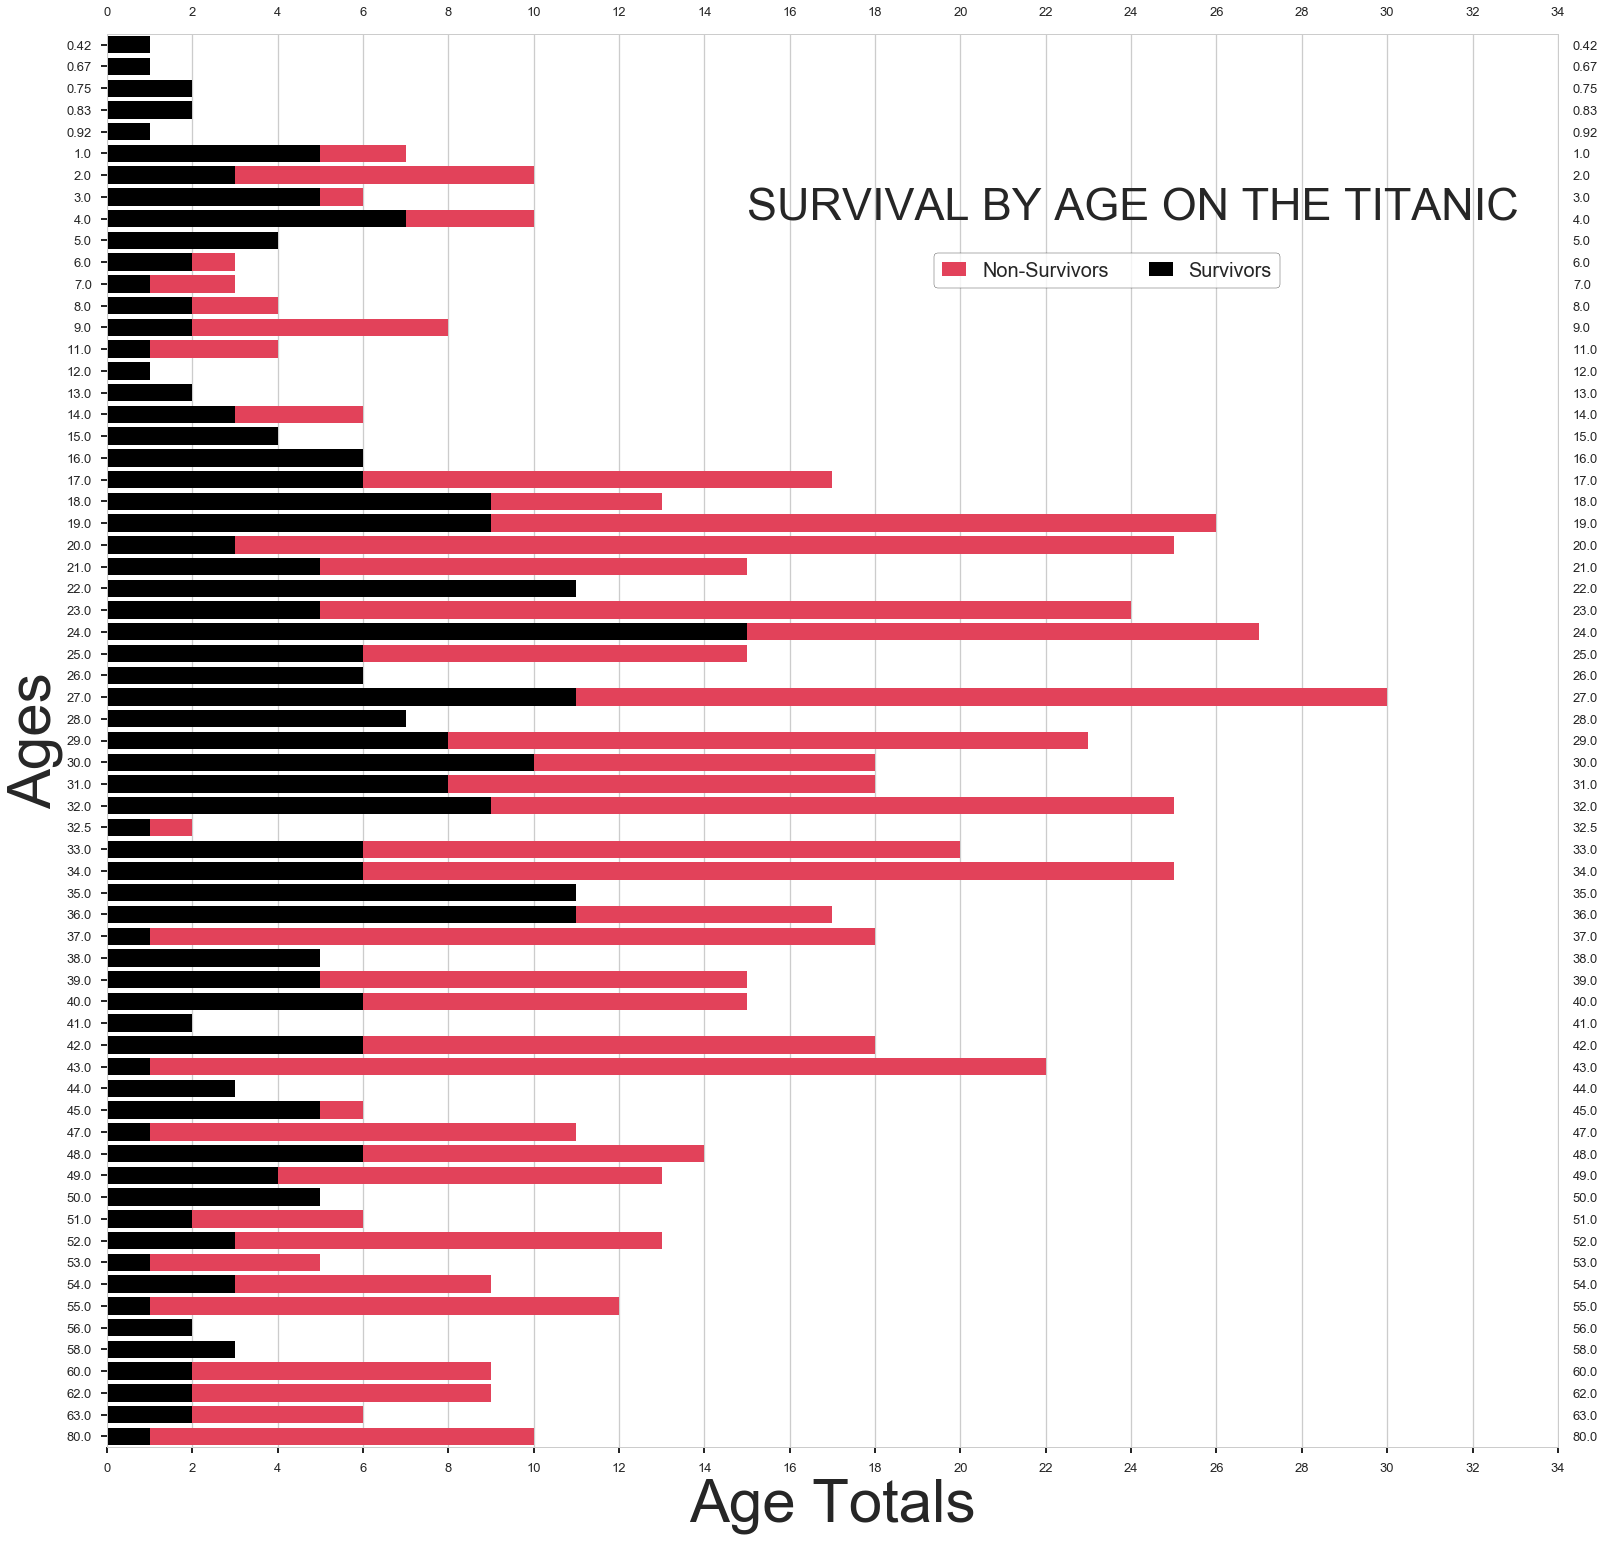

In [1053]:
sns.set(style='whitegrid', context='talk')
import matplotlib.ticker as ticker

#titanic_data_age['Age'] = titanic_data_age['Age'].apply(conv_to_int)
#survivor_ages['Age'] = survivor_ages['Age'].apply(conv_to_int)

fig,axes = plt.subplots(figsize=(26,26)) #, ax=axes

ax1 = sns.countplot(y="Age",data=titanic_data_age.dropna(), color='#FC2847', label='Non-Survivors')
ax2 = sns.countplot(y='Age',data=survivor_ages.dropna(), color='black', label='Survivors')

ax1.set_xlabel('Age Totals', fontsize=60)
ax1.set_ylabel('Ages', fontsize=60)
ax1.set_xticks(range(0,35,2))

ax1.tick_params(axis='y',which='both',labelleft='on', labelright='on', direction='out', length=6, width=2)
ax1.tick_params(axis='x',which='both',labeltop='on', labelbottom='on', direction='out', length=6, width=2)


#ax1.yaxis.tick_right()
#ax1.yaxis.set_ticks_position('both')
#ax1.xaxis.tick_top()
#ax1.xaxis.set_ticks_position('both')

#sns.despine(offset=20, trim=True)
 
plt.legend(fontsize = 20, loc=(0.57,0.82),ncol=2, frameon=True, edgecolor='black', handlelength=1.2);

plt.text(15,8.5,'Survival by Age On The Titanic'.upper(), \
         fontdict={'fontsize': 45,'fontweight' : 20,'verticalalignment': 'bottom'});

plt.savefig('Survival by Age On The Titanic.png', dpi=300)

## Question 2

##### Sex and Survivability: How did the female fare sex compared to males?

In [1008]:
Sex_and_Survival = titanic_data.groupby(['Sex', 'Survived']).size()

female_survival = (Sex_and_Survival['female',1])/(titanic_data['Sex'] == 'female').sum()
male_survival = (Sex_and_Survival['male',1])/(titanic_data['Sex'] == 'male').sum()

print(Sex_and_Survival)

print ('\n% female survival: {} %'.format(round((female_survival*100),2)))

print ('% male survival: {} %'.format(round((male_survival*100),2)))

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

% female survival: 74.2 %
% male survival: 18.89 %


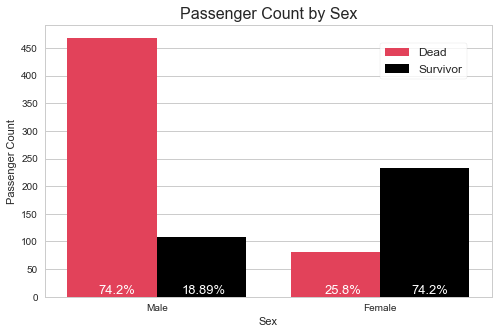

In [1200]:
sns.set(style='whitegrid')

fig,axes = plt.subplots(nrows=1, ncols=1,figsize=(8,5))

a0 = sns.countplot(x="Sex", hue="Survived", ax=axes, palette=palettes, data=titanic_data)

a0.set_title('Passenger Count by Sex',fontdict = {'fontsize': 16})
a0.set_ylabel('Passenger Count')
a0.set_yticks(range(0,500,50))
a0.set_xticklabels(['Male','Female'])

a0.legend(['Dead','Survivor'], fontsize=12, loc=(0.75,0.8),frameon=True);
a0.text(-0.26, 5, '74.2%', color='white', fontdict = {'fontsize': 13})
a0.text(0.11, 5, '18.89%', color='white', fontdict = {'fontsize': 13})

a0.text(0.75, 5, '25.8%', color='white', fontdict = {'fontsize': 13})
a0.text(1.14, 5, '74.2%', color='white', fontdict = {'fontsize': 13});

#sns.despine(offset=0.2, top=False, bottom=False, right= False, left=False, trim=True)

We can see that comparatively a lot more females survived much better than men as indicated by Question 1A. We have 74.2% of females surviving and 18.89% of males surviving.

## Question 3

##### Class and Survivability: Did people in one class survive better compared to other classes? And which class was it? 

Pclass  Sex     Survived
1       female  0             3
                1            91
        male    0            77
                1            45
2       female  0             6
                1            70
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
dtype: int64

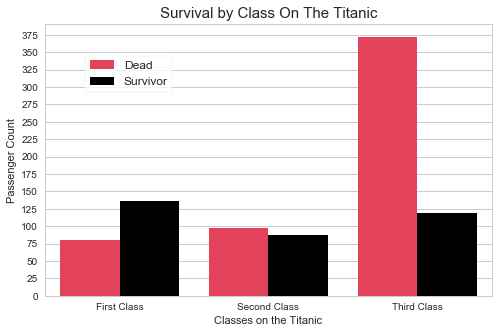

In [1422]:
sns.set(style='whitegrid')

fig,axes = plt.subplots(nrows=1, ncols=1,figsize=(8,5))

a0 = sns.countplot(x="Pclass", hue="Survived", palette=palettes, ax=axes, data=titanic_data)
a0.set_title('Survival by Class On The Titanic',  fontdict = {'fontsize': 15})
a0.set_ylabel('Passenger Count')
a0.set_xticklabels(['First Class', 'Second Class', 'Third Class'])
a0.set_xlabel('Classes on the Titanic')
a0.set_yticks(range(0,400,25));
a0.legend(['Dead','Survivor'],fontsize=12, loc=(0.09,0.75), frameon=True);

#class_and_sex = titanic_data.groupby(['Pclass', 'Sex', 'Survived']).count().astype('float')
class_and_sex = titanic_data.groupby(['Pclass', 'Sex', 'Survived']).size()

class_and_sex

#### NOTES:

People in First Class seemed to have the best survival by percentage. Second Class had near near equal percantages between survivors and non-survivors with the latter being slightly higher. Third Class however had the worst survival rates.

If we consider wealth and affluence as spending power(elitist in some circles), could we hypothesize that richer or more wealthy passengers would be in First class? Does this however mean that wealth or affulence also played a large part in survival? Then we would have to consider Fares under this umbrella to gain more insight. 

## Question 4

#### Relationships between Passenger Fare and survivability?

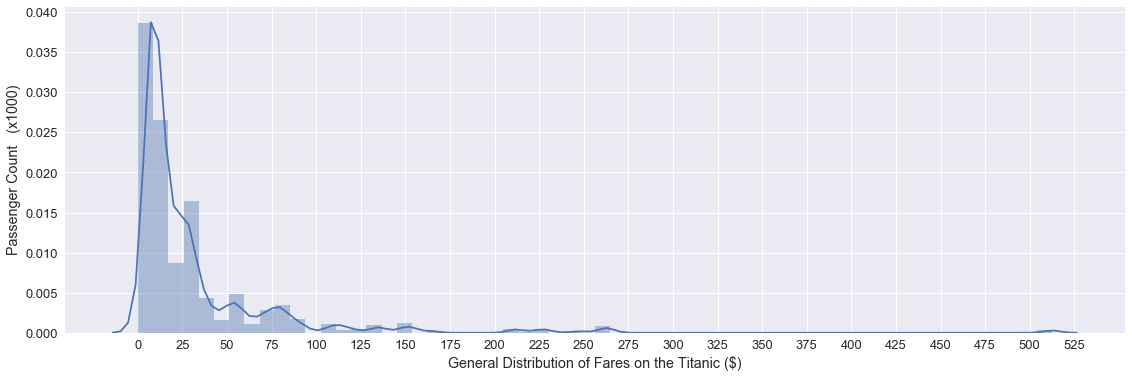

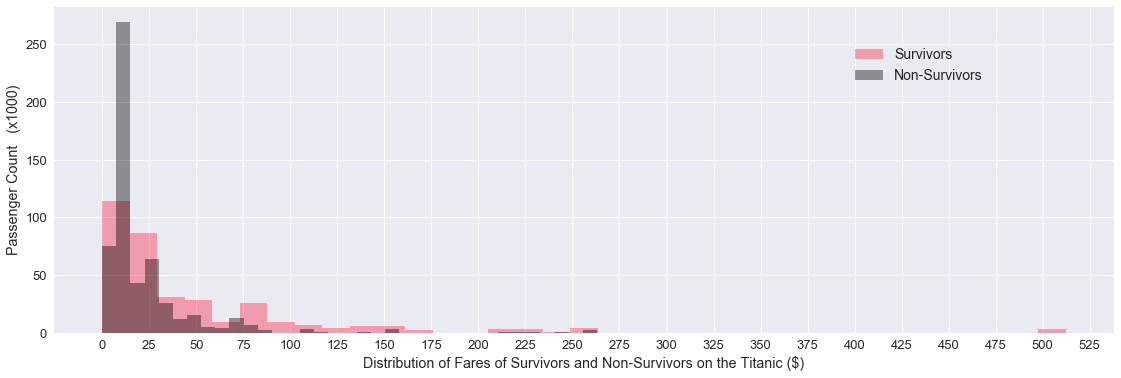

In [1419]:
#sns.set(style='whitegrid')

sns.set(style='darkgrid',font='sans-serif',font_scale=1.3)

fig,axes = plt.subplots(figsize=(19,6),nrows=1,ncols=1)

ax = sns.distplot(titanic_df['Fare'], bins=60, ax=axes, kde=True)
ax.set_xticks(range(0,550,25))
plt.ylabel('Passenger Count   (x1000)');
plt.xlabel('General Distribution of Fares on the Titanic ($)');
plt.show()

sns.set(style='darkgrid',font='sans-serif',font_scale=1.3)
fig,axes = plt.subplots(figsize=(19,6),nrows=1,ncols=1)
sns.distplot(titanic_df[titanic_df['Survived']==1]['Fare'], bins=35, hist=True, kde=False, color='#FC2847', label='Survivors'); 
sns.distplot(titanic_df[titanic_df['Survived']==0]['Fare'], bins=35, hist=True, kde=False, color='black', label='Non-Survivors');
plt.xticks(range(0,550,25))
plt.ylabel('Passenger Count   (x1000)');
plt.xlabel('Distribution of Fares of Survivors and Non-Survivors on the Titanic ($)');
plt.legend(loc=(0.75,0.75), fontsize=14)
plt.show()

#### NOTES:

One thing to note about survivor to nonsurvivor data is that at about 30 dollars, the number of survivors seems to rise above the non survivor data. And above 75 dollars we have more survivors. There also seems to be a lot of deaths at some point particularly below 20 dollars. 

Generally, the distribution of fares is skewed to the left. This means more people payed less for fares, especially below the $50 mark. It is particularly obvious beyond 100 dollars that these passengers are either may be overpaying for tickets or for some special privilege. 

Another alterior possibility is that these Passengers paid for perhaps more than one passenger.

#### CURIOUSITY: FAMILY AND HIGH FARES

In [1474]:
#titanic_df.loc[((titanic_df['Fare'] > 100) & (titanic_df['SibSp'] > 0))]

people_above_hundred = titanic_df.loc[(titanic_df['Fare'] > 100)]
print('Total Number of people paying above $100: ',len(people_above_hundred))

high_fares_with_family = people[((people['SibSp'] != 0) | (people['Parch'] != 0))]
print('Total Number of people with families or children paying above: ',len(high_fares_with_family))


high_fares_with_family.head()

Total Number of people paying above $100:  53
Total Number of people with families or children paying above:  37


PassengerId  Survived  Pclass  \
27            28         0       1   
31            32         1       1   
88            89         1       1   
118          119         0       1   
215          216         1       1   

                                               Name     Sex   Age  SibSp  \
27                   Fortune, Mr. Charles Alexander    male  19.0      3   
31   Spencer, Mrs. William Augustus (Marie Eugenie)  female   NaN      1   
88                       Fortune, Miss. Mabel Helen  female  23.0      3   
118                        Baxter, Mr. Quigg Edmond    male  24.0      0   
215                         Newell, Miss. Madeleine  female  31.0      1   

     Parch    Ticket      Fare        Cabin Embarked Family Name  \
27       2     19950  263.0000  C23 C25 C27        S     Fortune   
31       0  PC 17569  146.5208          B78        C     Spencer   
88       2     19950  263.0000  C23 C25 C27        S     Fortune   
118      1  PC 17558  247.5208      B58 B60        C      Baxter   
215      0     35273  113.2750          D36        C      Newell   

          Family Key  
27      Fortune19950  
31   SpencerPC 17569  
88      Fortune19950  
118   BaxterPC 17558  
215      Newell35273

In [1475]:
##From the Family key, we can get the number of people with family/children/parents/guardians 

high_fares_with_family['Family Name'].unique();

high_fares_with_family.groupby(['Family Name','Fare']).size()

Family Name           Fare    
Allison               151.5500    3
Astor                 227.5250    1
Baxter                247.5208    2
Cardeza               512.3292    1
Carter                120.0000    4
Douglas               106.4250    1
Fortune               263.0000    4
Frauenthal            133.6500    2
Graham                153.4625    2
Madill                211.3375    1
Newell                113.2750    3
Penasco y Castellana  108.9000    2
Robert                211.3375    1
Ryerson               262.3750    2
Spedden               134.5000    1
Spencer               146.5208    1
Thayer                110.8833    3
Wick                  164.8667    2
Widener               211.5000    1
dtype: int64

In [1511]:
high_fares_without_family = people[((people['SibSp'] == 0) & (people['Parch'] == 0))]

high_fares_without_family

PassengerId  Survived  Pclass                             Name     Sex  \
195          196         1       1             Lurette, Miss. Elise  female   
258          259         1       1                 Ward, Miss. Anna  female   
269          270         1       1           Bissette, Miss. Amelia  female   
306          307         1       1          Fleming, Miss. Margaret  female   
325          326         1       1         Young, Miss. Marie Grice  female   
337          338         1       1  Burns, Miss. Elizabeth Margaret  female   
373          374         0       1              Ringhini, Mr. Sante    male   
380          381         1       1            Bidois, Miss. Rosalie  female   
527          528         0       1               Farthing, Mr. John    male   
537          538         1       1              LeRoy, Miss. Bertha  female   
557          558         0       1              Robbins, Mr. Victor    male   
609          610         1       1        Shutes, Miss. Elizabeth W  female   
708          709         1       1             Cleaver, Miss. Alice  female   
716          717         1       1    Endres, Miss. Caroline Louise  female   
730          731         1       1    Allen, Miss. Elisabeth Walton  female   
737          738         1       1           Lesurer, Mr. Gustave J    male   

      Age  SibSp  Parch    Ticket      Fare Cabin Embarked Family Name  \
195  58.0      0      0  PC 17569  146.5208   B80        C     Lurette   
258  35.0      0      0  PC 17755  512.3292   NaN        C        Ward   
269  35.0      0      0  PC 17760  135.6333   C99        S    Bissette   
306   NaN      0      0     17421  110.8833   NaN        C     Fleming   
325  36.0      0      0  PC 17760  135.6333   C32        C       Young   
337  41.0      0      0     16966  134.5000   E40        C       Burns   
373  22.0      0      0  PC 17760  135.6333   NaN        C    Ringhini   
380  42.0      0      0  PC 17757  227.5250   NaN        C      Bidois   
527   NaN      0      0  PC 17483  221.7792   C95        S    Farthing   
537  30.0      0      0  PC 17761  106.4250   NaN        C       LeRoy   
557   NaN      0      0  PC 17757  227.5250   NaN        C     Robbins   
609  40.0      0      0  PC 17582  153.4625  C125        S      Shutes   
708  22.0      0      0    113781  151.5500   NaN        S     Cleaver   
716  38.0      0      0  PC 17757  227.5250   C45        C      Endres   
730  29.0      0      0     24160  211.3375    B5        S       Allen   
737  35.0      0      0  PC 17755  512.3292  B101        C     Lesurer   

           Family Key  
195   LurettePC 17569  
258      WardPC 17755  
269  BissettePC 17760  
306      Fleming17421  
325     YoungPC 17760  
337        Burns16966  
373  RinghiniPC 17760  
380    BidoisPC 17757  
527  FarthingPC 17483  
537     LeRoyPC 17761  
557   RobbinsPC 17757  
609    ShutesPC 17582  
708     Cleaver113781  
716    EndresPC 17757  
730        Allen24160  
737   LesurerPC 17755

#### NOTES:

We have 53 passengers paying above $100 for tickets. Of the 53 passengers, 37 have or are with family members (or parents or children) which might account for the higher fares as summed amounts.

## Question 5

##### In what proportions did survivors fall by Port Of Embarkation?

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

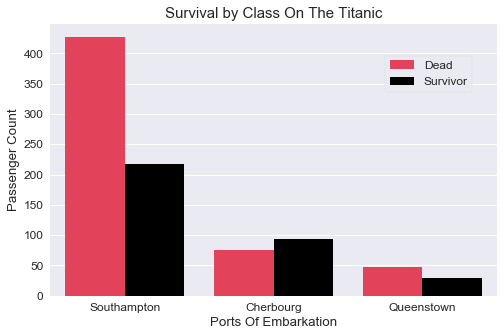

In [45]:
#nsns.boxplot(x="Embarked", y="Fare", hue="Survived",data=titanic_data, fliersize=8)
#sns.countplot(x="Embarked", hue="Survived",data=titanic_data)
#plt.title('Passenger Fare And Survivability by Port Of Embarkation')

fig,axes= fig,axes = plt.subplots(figsize=(8,5),nrows=1,ncols=1)

#sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette=palettes)

a0 = sns.countplot(x="Embarked", hue="Survived", ax=axes, data=titanic_data, palette=palettes)
a0.set_title('Survival by Class On The Titanic',  fontdict = {'fontsize': 15})
a0.set_ylabel('Passenger Count')
a0.set_xticklabels(['Southampton','Cherbourg', 'Queenstown'])
a0.set_xlabel('Ports Of Embarkation')
#a0.set_yticks(range(0,450,25));
a0.legend(['Dead','Survivor'],fontsize=12, loc=(0.75,0.75), frameon=True);

embarked = titanic_data.groupby(['Embarked', 'Survived']).size()
embarked

#### NOTES:

The highest number of passengers embarked from Southamptom (644 passengers) with a 33.7% percentage survival.

Passengers from Cherbourg seemed to have fared way better with a 55.36% survival percentage (out of 168 passengers).

Queenstown had the lowest number of passengers with a 38.96% percentage survival (out of 77 passengers).


It seemed that passengers Embarking from Cherbourg had the best survival. 

## Question 6

##### Are those who are more affluent or wealthy (judging by Fare and Class) given some form of preference?

If we judge wealthy or priviledge by spending power then most of these passengers might be either in First or Second Class and may have paid higher fares.

A simple bit of visualization could solve this question. A boxplot is great because it singles out the outliers, those who might have paid extremely higher for fares and marks them seprate from the varying data.

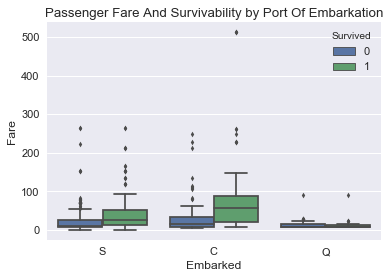

In [1514]:
sns.set(style='darkgrid',font='sans-serif',font_scale=1.1)

sns.boxplot(x="Embarked", y="Fare", hue="Survived",data=titanic_data, fliersize=4);
plt.title('Passenger Fare And Survivability by Port Of Embarkation');

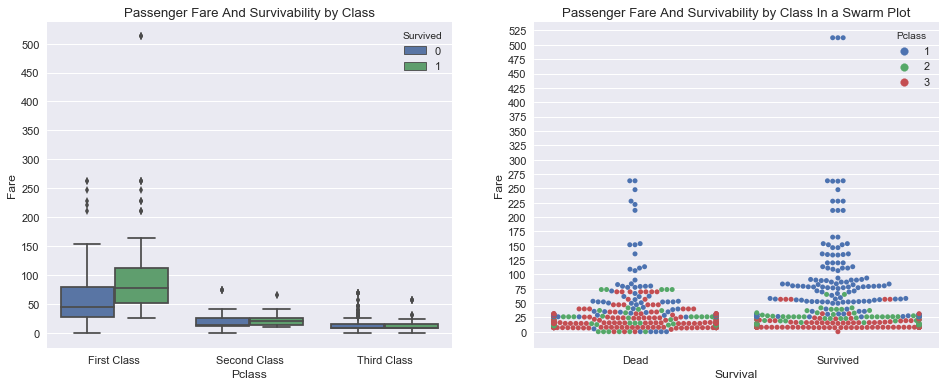

In [1515]:
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(16,6))

box = sns.boxplot(x="Pclass", y="Fare", hue="Survived", ax=axes[0], data=titanic_data, fliersize=5);
box.set_title('Passenger Fare And Survivability by Class')
box.set_yticks(range(0,550,50));
box.set_xticklabels(['First Class','Second Class','Third Class'])

swarm = sns.swarmplot(x="Survived", y="Fare", hue="Pclass", ax=axes[1], data=titanic_data)
swarm.set_yticks(range(0,550,25));
swarm.set_ylabel('Fare')
swarm.set_xlabel('Survival')
swarm.set_xticklabels(['Dead','Survived'])
swarm.set_title('Passenger Fare And Survivability by Class In a Swarm Plot');

In [1516]:
first_class = titanic_df[titanic_df['Pclass'] == 1]
first_class[((first_class['Fare'] <50) & (first_class['Fare'] != 0))].head()

PassengerId  Survived  Pclass                          Name     Sex   Age  \
11           12         1       1      Bonnell, Miss. Elizabeth  female  58.0   
23           24         1       1  Sloper, Mr. William Thompson    male  28.0   
30           31         0       1      Uruchurtu, Don. Manuel E    male  40.0   
55           56         1       1             Woolner, Mr. Hugh    male   NaN   
64           65         0       1         Stewart, Mr. Albert A    male   NaN   

    SibSp  Parch    Ticket     Fare Cabin Embarked Family Name  \
11      0      0    113783  26.5500  C103        S     Bonnell   
23      0      0    113788  35.5000    A6        S      Sloper   
30      0      0  PC 17601  27.7208   NaN        C   Uruchurtu   
55      0      0     19947  35.5000   C52        S     Woolner   
64      0      0  PC 17605  27.7208   NaN        C     Stewart   

           Family Key  
11      Bonnell113783  
23       Sloper113788  
30  UruchurtuPC 17601  
55       Woolner19947  
64    StewartPC 17605

#### NOTES:

The cozy thing to note here is that passengers that spent more on Ticket Fare seemed to have survived the sinking of the titanic. 

Considering fare data by point of Embarkation, First Class seems to also have paid marginally higher with most tickets being sold at 50 dollars and above. It could be presumed to be a general cutoff as to the floor of First Class prices.


Also, we can hypothesize in a rather rounabout manner that ticket price did affect survivability in some manner.
By port, we notice that Southampton and Cherbough we have survivors paying higher fares. Cherbough seemed to have passengers paying the highest. It is also impotant here to remember our findings of Cherbough having the best survival rate by passengers. 


It's is a curiousity to then confirm what one might suspect, that probably a good portion of First Class (wealthier candidates) Embarked from Cherbough.

#### CURIOUSITY: FIRST CLASS AND CHERBOUGH

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

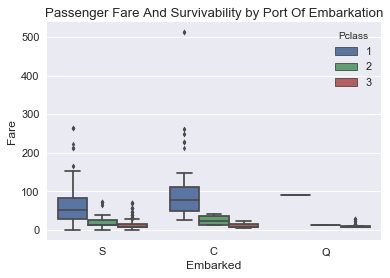

In [1517]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass",data=titanic_data, fliersize=4);
plt.title('Passenger Fare And Survivability by Port Of Embarkation');

titanic_data.groupby(['Embarked','Pclass']).size()

#### NOTES

Af first look, Southampton has the highest number of First Class Passengers boarding. But while Cherbough may not have the total highest First Class Passengers, by Percentagewe can see that 50.6% of people embarking from the port were first class passengers. For Southampton though, First Class passengers are only 19.72% of the total passengers boarding from the port.

One thing that is somewhat curious is that some passsengers seem to have boarded without any fare.

#### PECULIARITY: NO FARE?

In [1518]:
no_fares = titanic_df[titanic_df['Fare'] == 0]

no_fares

PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. Robert J  male   
806          807         0       1            Andrews, Mr. Thomas Jr  male   
815          816         0       1                  Fry, Mr. Richard  male   
822          823         0       1   Reuchlin, Jonkheer. John George  male   

      Age  SibSp  Parch  Ticket  Fare Cabin Embarked Family Name  \
179  36.0      0      0    LINE   0.0   NaN        S     Leonard   
263  40.0      0      0  112059   0.0   B94        S    Harrison   
271  25.0      0      0    LINE   0.0   NaN        S   Tornquist   
277   NaN      0      0  239853   0.0   NaN        S      Parkes   
302  19.0      0      0    LINE   0.0   NaN        S     Johnson   
413   NaN      0      0  239853   0.0   NaN        S  Cunningham   
466   NaN      0      0  239853   0.0   NaN        S    Campbell   
481   NaN      0      0  239854   0.0   NaN        S       Frost   
597  49.0      0      0    LINE   0.0   NaN        S     Johnson   
633   NaN      0      0  112052   0.0   NaN        S        Parr   
674   NaN      0      0  239856   0.0   NaN        S      Watson   
732   NaN      0      0  239855   0.0   NaN        S      Knight   
806  39.0      0      0  112050   0.0   A36        S     Andrews   
815   NaN      0      0  112058   0.0  B102        S         Fry   
822  38.0      0      0   19972   0.0   NaN        S    Reuchlin   

           Family Key  
179       LeonardLINE  
263    Harrison112059  
271     TornquistLINE  
277      Parkes239853  
302       JohnsonLINE  
413  Cunningham239853  
466    Campbell239853  
481       Frost239854  
597       JohnsonLINE  
633        Parr112052  
674      Watson239856  
732      Knight239855  
806     Andrews112050  
815         Fry112058  
822     Reuchlin19972

#### NOTES: NO FARE?

Of the 15 passengers who paid no Fare at all, only 14 survived. And all these passengers are Male with no Siblings/Spouses and no Parents or Children and all seemed to have boarded from Southampton. There also seems to be some synchronicity in ticket information for these individuals excepting those with 'LINE'. Removing these individuals, all others are either First Class or Second Class passengers.

A distinction has to be made that some of these passengers seem to have their ticket data as 'LINE' and they paid no ticket fares. These individuals share a common class which is 3rd class.

In [1493]:
titanic_df[titanic_df['Ticket'] == 'LINE']

PassengerId  Survived  Pclass                             Name   Sex  \
179          180         0       3              Leonard, Mr. Lionel  male   
271          272         1       3     Tornquist, Mr. William Henry  male   
302          303         0       3  Johnson, Mr. William Cahoone Jr  male   
597          598         0       3              Johnson, Mr. Alfred  male   

      Age  SibSp  Parch Ticket  Fare Cabin Embarked Family Name     Family Key  
179  36.0      0      0   LINE   0.0   NaN        S     Leonard    LeonardLINE  
271  25.0      0      0   LINE   0.0   NaN        S   Tornquist  TornquistLINE  
302  19.0      0      0   LINE   0.0   NaN        S     Johnson    JohnsonLINE  
597  49.0      0      0   LINE   0.0   NaN        S     Johnson    JohnsonLINE

## Question 7

#### Did Families fare well in survival? (This touches on number of siblings and parent child relationships?

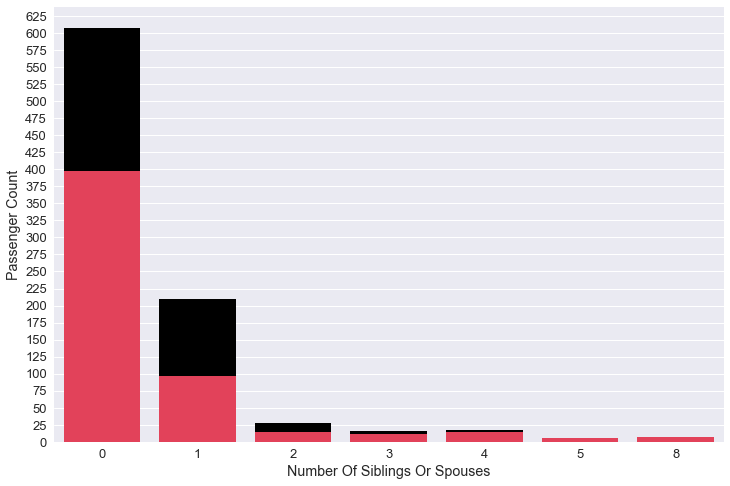

In [56]:
sns.set(style='darkgrid',font='sans-serif',font_scale=1.3)

fig,axes = plt.subplots(figsize=(12,8),nrows=1,ncols=1)

survived=titanic_df[titanic_df["Survived"]==0]
ax0 = sns.countplot(titanic_df['SibSp'], ax=axes, color="black")#darkblue
ax1 = sns.countplot(survived['SibSp'], ax=axes, color="#FC2847")
ax0.set_yticks(range(0,650,25))
plt
ax0.set_yticks(range(0,650,25))
plt.ylabel('Passenger Count');
plt.xlabel('Number Of Siblings Or Spouses');
plt.show()

In [1578]:
titanic_df.groupby(['Family Name','Survived']).size()[titanic_df.groupby(['Family Name','Survived']).size() > 4]

Family Name  Survived
Andersson    0           7
Goodwin      0           6
Panula       0           6
Rice         0           5
Sage         0           7
Skoog        0           6
dtype: int64

In [1579]:
titanic_df.groupby(['SibSp','Survived']).size()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
dtype: int64

In [1580]:
family_more_than_three = titanic_df[titanic_df['SibSp'] > 3]
family_more_than_three.groupby('Family Name').size()

Family Name
Andersson    6
Asplund      3
Goodwin      5
Panula       5
Rice         4
Sage         7
dtype: int64

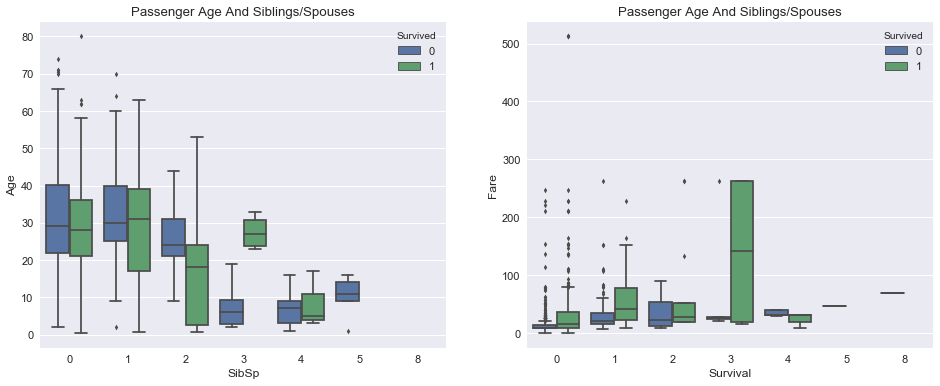

In [1581]:
sns.set(style='darkgrid',font='sans-serif',font_scale=1.1)

fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(16,6))

box = sns.boxplot(x="SibSp", y="Age", hue="Survived", ax=axes[0], data=titanic_data, fliersize=4)
box.set_title('Passenger Age And Siblings/Spouses')
#box.set_yticks(range(0,550,50));


swarm = sns.boxplot(x="SibSp", y="Fare", hue="Survived", ax=axes[1], data=titanic_data, fliersize=4)
#swarm.set_yticks(range(0,550,25));
swarm.set_ylabel('Fare')
swarm.set_xlabel('Survival')
swarm.set_title('Passenger Age And Siblings/Spouses');

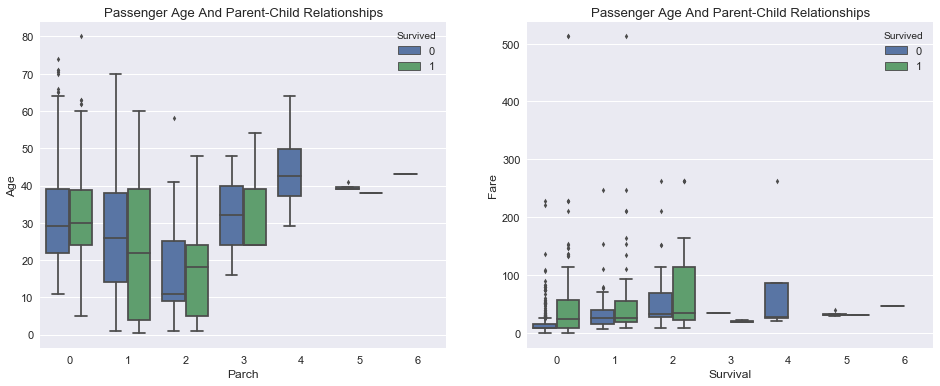

In [1584]:
sns.set(style='darkgrid',font='sans-serif',font_scale=1.1)

fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(16,6))

box = sns.boxplot(x="Parch", y="Age", hue="Survived", ax=axes[0], data=titanic_data, fliersize=4)
box.set_title('Passenger Age And Parent-Child Relationships')
#box.set_yticks(range(0,550,50));


swarm = sns.boxplot(x="Parch", y="Fare", hue="Survived", ax=axes[1], data=titanic_data, fliersize=4)
#swarm.set_yticks(range(0,550,25));
swarm.set_ylabel('Fare')
swarm.set_xlabel('Survival')
swarm.set_title('Passenger Age And Parent-Child Relationships');

#### NOTES:

It seems not one family of above 4 members survived titanic.

# Some Observations

### The Tragedy Of The Titanic

While investigating survivability against the number of Sibling Spouses('SibSp'), I ran into a peculair phenomenon.

It seemed that people with 4 and above, especially SibSp=8 seemed to fair terrribly badly. 


What's even more peculiar is that these people were missing also missing all Age data and Cabin Data which might have made them candidates for Data removal in some analysis. 

Further investigation led to the conclusion that these individuals were actually one family. It turns out that they share the same first name (as well as family name). 'Sage' 

More effort to discover more about this family and their circumstances however was limited by the amount of data.

In [1099]:
titanic_df.groupby(['SibSp','Family Key','Survived']).size().tail()

SibSp  Family Key      Survived
4      Asplund347077   1           2
       Panula3101295   0           5
       Rice382652      0           4
5      GoodwinCA 2144  0           5
8      SageCA. 2343    0           7
dtype: int64

In [41]:
titanic_df[titanic_df['Family Name'] == 'Sage']

PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked Family Name  \
159  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   
180  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   
201  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   
324  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   
792  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   
846  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   
863  NaN      8      2  CA. 2343  69.55   NaN        S        Sage   

       Family Key  
159  SageCA. 2343  
180  SageCA. 2343  
201  SageCA. 2343  
324  SageCA. 2343  
792  SageCA. 2343  
846  SageCA. 2343  
863  SageCA. 2343

In [1484]:
#titanic_df[titanic_df['Family Name'] == 'Sage']

mother = titanic_df[((titanic_df['Embarked'] == 'S') & (titanic_df['Pclass'] == 3) & (titanic_df['Parch'] == 2) & \
                        (titanic_df['Sex']=='female'))]

#titanic_df[titanic_df['Ticket'] == 'CA. 2343']

mother

PassengerId  Survived  Pclass  \
8              9         1       3   
68            69         1       3   
71            72         0       3   
119          120         0       3   
147          148         0       3   
180          181         0       3   
184          185         1       3   
233          234         1       3   
254          255         0       3   
394          395         1       3   
419          420         0       3   
436          437         0       3   
541          542         0       3   
542          543         0       3   
634          635         0       3   
642          643         0       3   
792          793         0       3   
813          814         0       3   
863          864         0       3   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
68                     Andersson, Miss. Erna Alexandra  female  17.0      4   
71                          Goodwin, Miss. Lillian Amy  female  16.0      5   
119                  Andersson, Miss. Ellis Anna Maria  female   2.0      4   
147                   Ford, Miss. Robina Maggie "Ruby"  female   9.0      2   
180                       Sage, Miss. Constance Gladys  female   NaN      8   
184                Kink-Heilmann, Miss. Luise Gretchen  female   4.0      0   
233                     Asplund, Miss. Lillian Gertrud  female   5.0      4   
254           Rosblom, Mrs. Viktor (Helena Wilhelmina)  female  41.0      0   
394  Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...  female  24.0      0   
419                          Van Impe, Miss. Catharina  female  10.0      0   
436               Ford, Miss. Doolina Margaret "Daisy"  female  21.0      2   
541               Andersson, Miss. Ingeborg Constanzia  female   9.0      4   
542                  Andersson, Miss. Sigrid Elisabeth  female  11.0      4   
634                                 Skoog, Miss. Mabel  female   9.0      3   
642                      Skoog, Miss. Margit Elizabeth  female   2.0      3   
792                            Sage, Miss. Stella Anna  female   NaN      8   
813                 Andersson, Miss. Ebba Iris Alfrida  female   6.0      4   
863                  Sage, Miss. Dorothy Edith "Dolly"  female   NaN      8   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   

     Parch      Ticket     Fare Cabin Embarked    Family Name  \
8        2      347742  11.1333   NaN        S        Johnson   
68       2     3101281   7.9250   NaN        S      Andersson   
71       2     CA 2144  46.9000   NaN        S        Goodwin   
119      2      347082  31.2750   NaN        S      Andersson   
147      2  W./C. 6608  34.3750   NaN        S           Ford   
180      2    CA. 2343  69.5500   NaN        S           Sage   
184      2      315153  22.0250   NaN        S  Kink-Heilmann   
233      2      347077  31.3875   NaN        S        Asplund   
254      2      370129  20.2125   NaN        S        Rosblom   
394      2     PP 9549  16.7000    G6        S      Sandstrom   
419      2      345773  24.1500   NaN        S       Van Impe   
436      2  W./C. 6608  34.3750   NaN        S           Ford   
541      2      347082  31.2750   NaN        S      Andersson   
542      2      347082  31.2750   NaN        S      Andersson   
634      2      347088  27.9000   NaN        S          Skoog   
642      2      347088  27.9000   NaN        S          Skoog   
792      2    CA. 2343  69.5500   NaN        S           Sage   
813      2      347082  31.2750   NaN        S      Andersson   
863      2    CA. 2343  69.5500   NaN        S           Sage   
888      2  W./C. 6607  23.4500   NaN        S       Johnston   

              Family Key  
8          Johnson347742  
68      Andersson3101281  
71        GoodwinCA 2144  
119      Andersson347082  
147       FordW./C. 6608  
180         SageCA

# CONCLUSION